In [1]:
import pandas as pd
from data_transform import DataTransform
from dataframeinfo import DataFrameInfo
from dataframe_transform import impute_all_null_columns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from plotter import Plotter 

In [2]:
# Load Data
df = pd.read_csv("csv_files/loan_payments.csv")
# Cast Datatypes
transformer = DataTransform()
df_info = DataFrameInfo(df)
df = transformer.encode_transform(df)
df = transformer.transform_digit_string(df)
df = transformer.cast_column_dtypes(df)

id --> int32
member_id --> int32
loan_amount --> int32
funded_amount --> float32
funded_amount_inv --> float32
term --> int32
int_rate --> float32
instalment --> float32
grade --> category
sub_grade --> category
employment_length --> int32
home_ownership --> category
annual_inc --> float32
verification_status --> category
issue_date --> date
loan_status --> category
payment_plan --> category
purpose --> category
dti --> float32
delinq_2yrs --> int32
earliest_credit_line --> date
inq_last_6mths --> int32
mths_since_last_delinq --> int32
mths_since_last_record --> int32
open_accounts --> int32
total_accounts --> int32
out_prncp --> float32
out_prncp_inv --> float32
total_payment --> float32
total_payment_inv --> float32
total_rec_prncp --> float32
total_rec_int --> float32
total_rec_late_fee --> float32
recoveries --> float32
collection_recovery_fee --> float32
last_payment_date --> date
last_payment_amount --> float32
next_payment_date --> date
last_credit_pull_date --> date
collections

In [3]:
df = impute_all_null_columns(df)

                             number of nulls  percentage of nulls  \
funded_amount                           3007                 5.54   
term                                    4772                 8.80   
int_rate                                5169                 9.53   
employment_length                       2118                 3.91   
mths_since_last_delinq                 31002                57.17   
mths_since_last_record                 48050                88.60   
collections_12_mths_ex_med                51                 0.09   
mths_since_last_major_derog            46732                86.17   

                             percentage of non-nulls  
funded_amount                                  94.46  
term                                           91.20  
int_rate                                       90.47  
employment_length                              96.09  
mths_since_last_delinq                         42.83  
mths_since_last_record                         1

In [5]:
data_info = DataFrameInfo(df)
cat_columns = data_info.categorical_columns
print(cat_columns)

['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose', 'application_type']


In [7]:
num_columns = data_info.numerical_columns
print(num_columns)

['Unnamed: 0', 'id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'employment_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med', 'policy_code']


In [8]:
print(len(num_columns) + len(cat_columns))
print(len(df.columns))

36
40


In [10]:
datetime_cols = data_info.datetime_columns
datetime_df = df[datetime_cols]

In [11]:
print(datetime_df)

      issue_date earliest_credit_line last_payment_date last_credit_pull_date
0     2021-01-01           1987-10-01        2022-01-01            2022-01-01
1     2021-01-01           2001-09-01        2022-01-01            2022-01-01
2     2021-01-01           1998-09-01        2021-10-01            2021-10-01
3     2021-01-01           2008-06-01        2021-06-01            2021-06-01
4     2021-01-01           2002-04-01        2022-01-01            2022-01-01
...          ...                  ...               ...                   ...
54226 2013-07-01           2003-04-01        2016-07-01            2016-07-01
54227 2013-10-01           1999-01-01        2016-10-01            2016-09-01
54228 2013-08-01           1984-02-01        2016-09-01            2013-05-01
54229 2013-08-01           1995-03-01        2014-03-01            2013-05-01
54230 2013-07-01           1998-10-01        2014-03-01            2015-01-01

[54231 rows x 4 columns]


In [12]:
num_columns = [column for column in num_columns if column not in datetime_cols]

In [13]:
print(num_columns)

['Unnamed: 0', 'id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'employment_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med', 'policy_code']


In [14]:
for column in num_columns:
    print(column, df[column].skew())

Unnamed: 0 0.0
id 2.370336021094686
member_id 2.205422084785879
loan_amount 0.8052592257800115
funded_amount 0.84556293
funded_amount_inv 0.8139274
term 1.1483575
int_rate 0.4331925
instalment 0.99698156
employment_length 0.6764905
annual_inc 8.71183
dti 0.18941957
delinq_2yrs 5.370001885877136
inq_last_6mths 3.248918364007299
open_accounts 1.0592820053165104
total_accounts 0.7790139244121327
out_prncp 2.3564262
out_prncp_inv 2.3568475
total_payment 1.2678912
total_payment_inv 1.2561967
total_rec_prncp 1.2610146
total_rec_int 2.204322
total_rec_late_fee 13.184304
recoveries 14.589793
collection_recovery_fee 27.636843
last_payment_amount 2.499381
collections_12_mths_ex_med 20.262375
policy_code 0


/tmp/ipykernel_140903/3307739546.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[num_columns].hist(ax=ax, color = "skyblue", edgecolor = "gold")


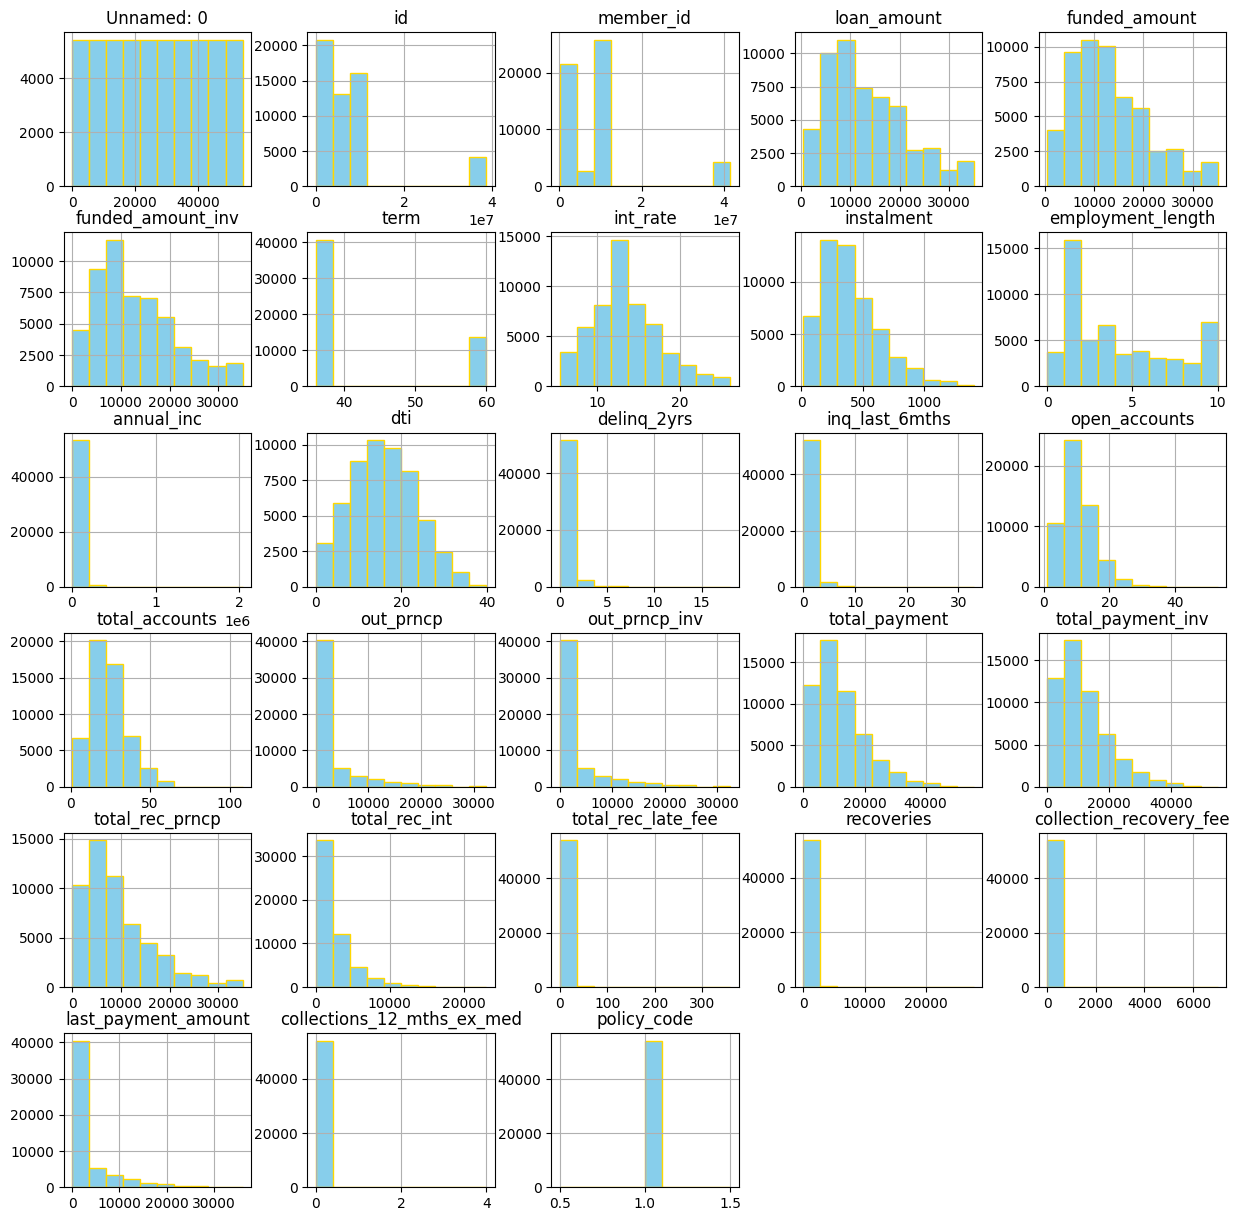

In [15]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df[num_columns].hist(ax=ax, color = "skyblue", edgecolor = "gold")
plt.show()


In [16]:
#COLUMNS THAT ARE SKEWED UNDER OR OVER 1:
# under 1
less_than_1 = [column for column in num_columns if df[column].skew() < 1]
# 1 and over
over_1 = [column for column in num_columns if df[column].skew() >= 1]

Unnamed: 0: 
	0.0
loan_amount: 
	0.8052592257800115
funded_amount: 
	0.8455629348754883
funded_amount_inv: 
	0.813927412033081
int_rate: 
	0.43319249153137207
instalment: 
	0.9969815611839294
employment_length: 
	0.6764904856681824
dti: 
	0.18941956758499146
total_accounts: 
	0.7790139244121327
policy_code: 
	0


/tmp/ipykernel_140903/1930027144.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[less_than_1].hist(ax=ax, color = "skyblue", edgecolor = "gold")


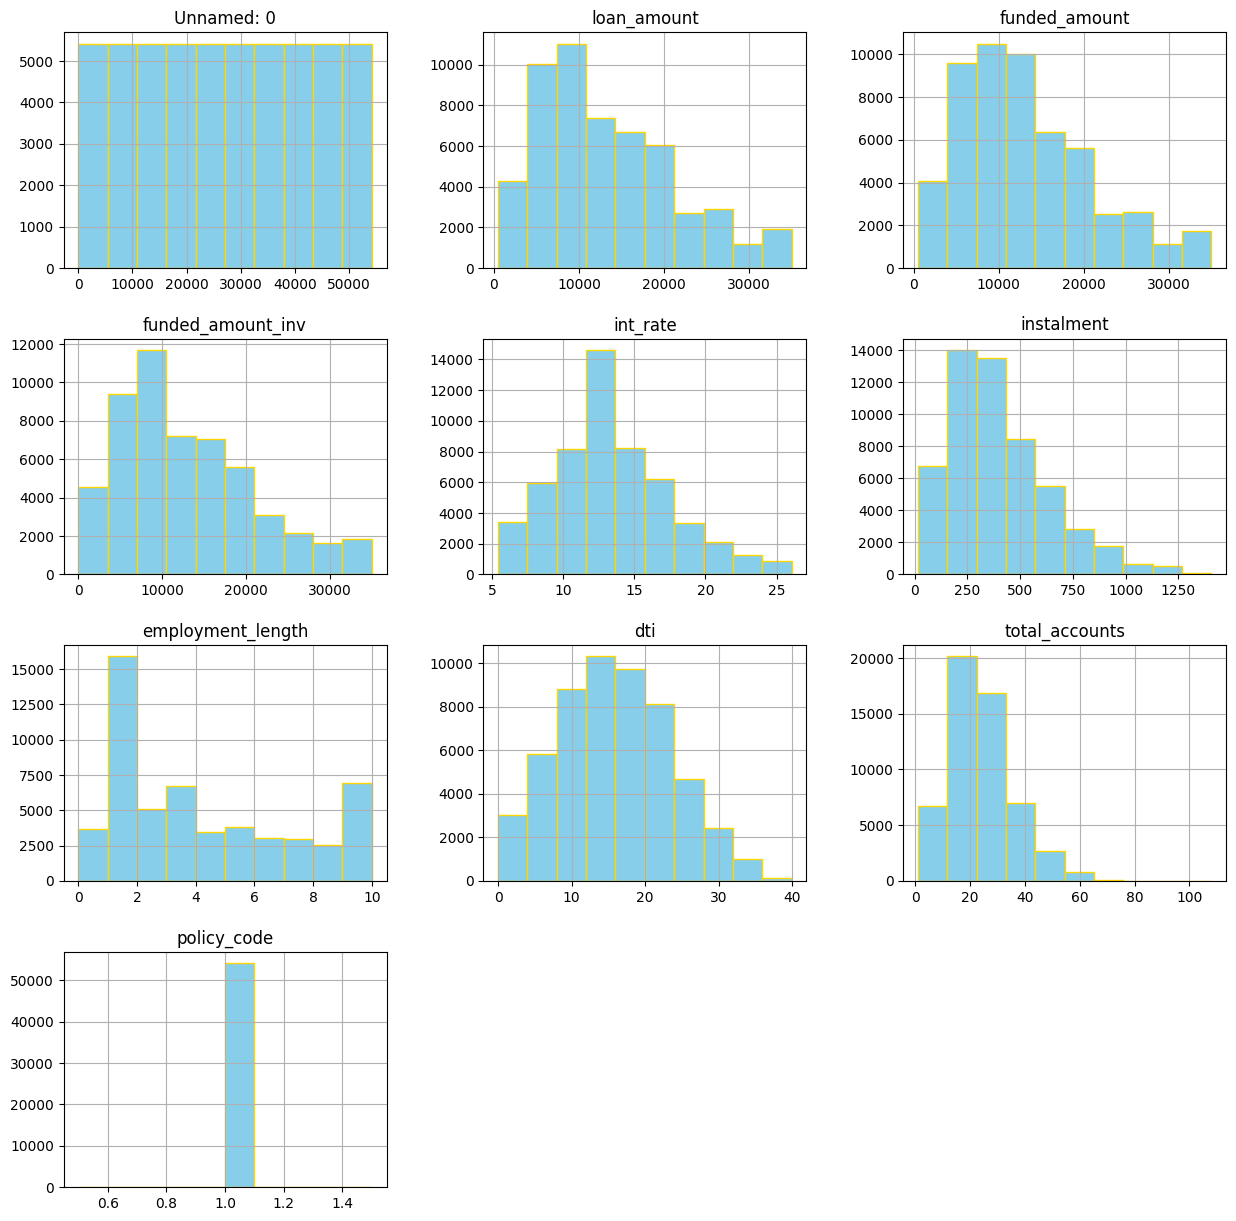

In [17]:
# under 1 HISTOGRAMS

for column in less_than_1:
    print(f'{column}: \n\t{df[column].skew()}') 

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df[less_than_1].hist(ax=ax, color = "skyblue", edgecolor = "gold")
plt.show()

id: 
	2.370336021094686
member_id: 
	2.205422084785879
term: 
	1.1483575105667114
annual_inc: 
	8.711830139160156
delinq_2yrs: 
	5.370001885877136
inq_last_6mths: 
	3.248918364007299
open_accounts: 
	1.0592820053165104
out_prncp: 
	2.356426239013672
out_prncp_inv: 
	2.3568475246429443
total_payment: 
	1.2678911685943604
total_payment_inv: 
	1.2561967372894287
total_rec_prncp: 
	1.2610145807266235
total_rec_int: 
	2.204322099685669
total_rec_late_fee: 
	13.184304237365723
recoveries: 
	14.58979320526123
collection_recovery_fee: 
	27.636842727661133
last_payment_amount: 
	2.4993810653686523
collections_12_mths_ex_med: 
	20.262374877929688


/tmp/ipykernel_140903/1255851997.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[over_1].hist(ax=ax, color = "skyblue", edgecolor = "gold")


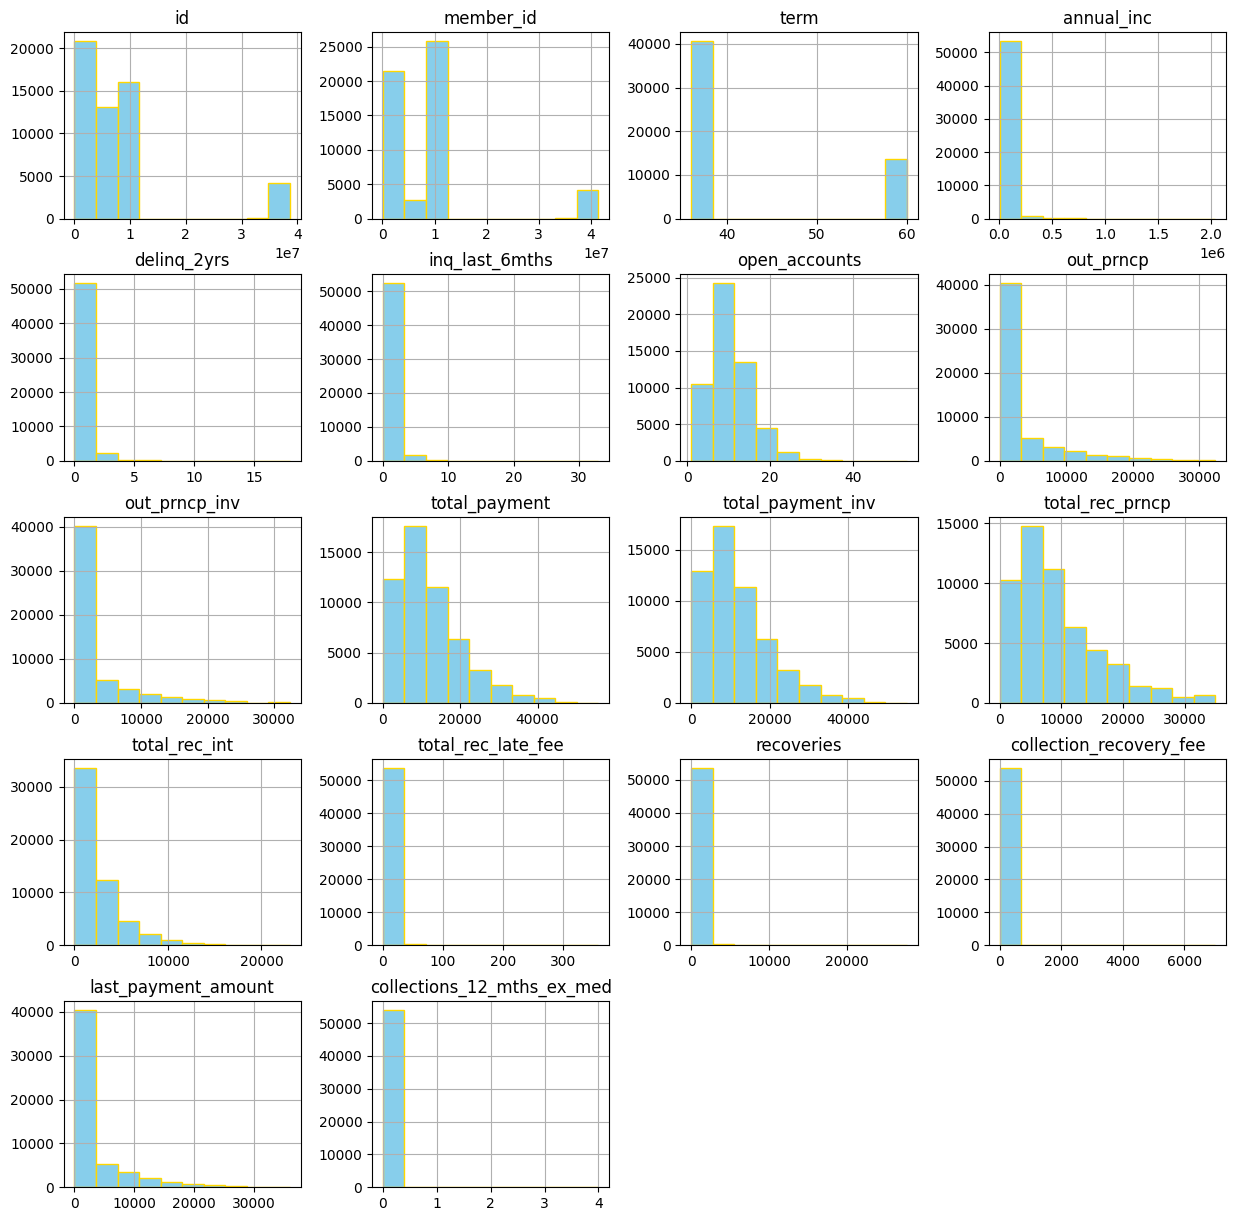

In [18]:
# 1 and over HISTOGRAMS

for column in over_1:
    print(f'{column}: \n\t{df[column].skew()}') 

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df[over_1].hist(ax=ax, color = "skyblue", edgecolor = "gold")
plt.show()

In [19]:
plotter = Plotter()

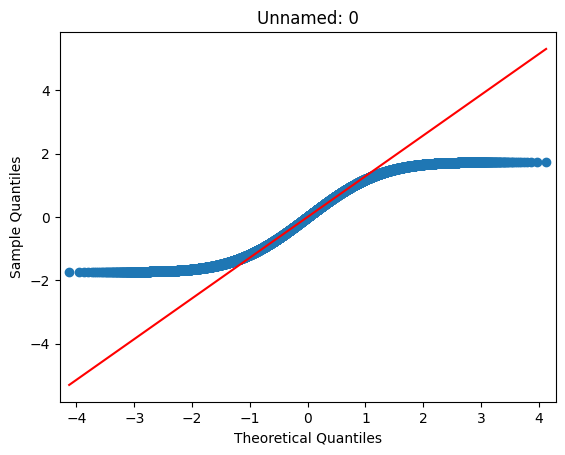

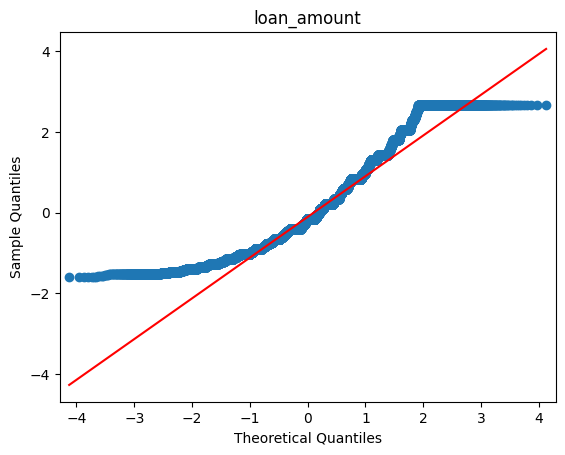

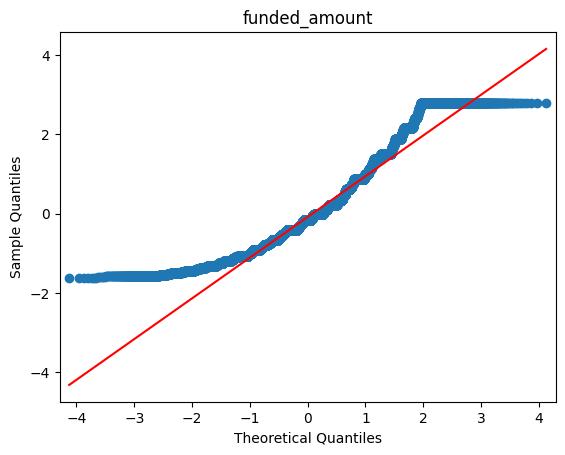

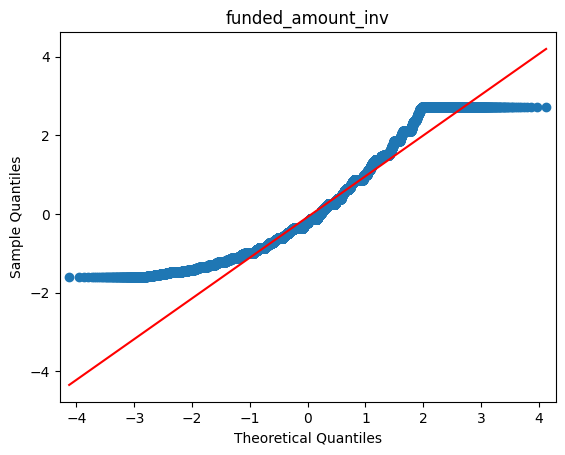

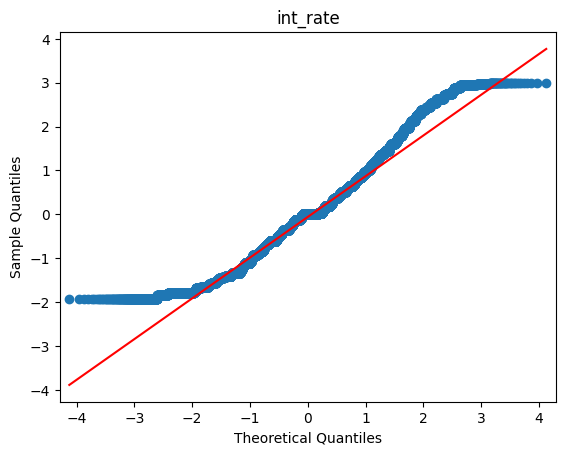

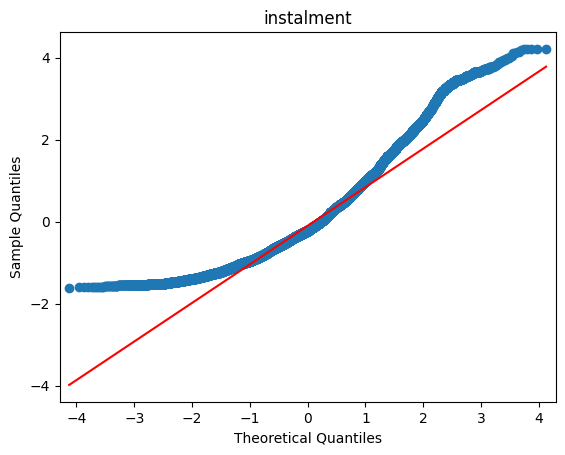

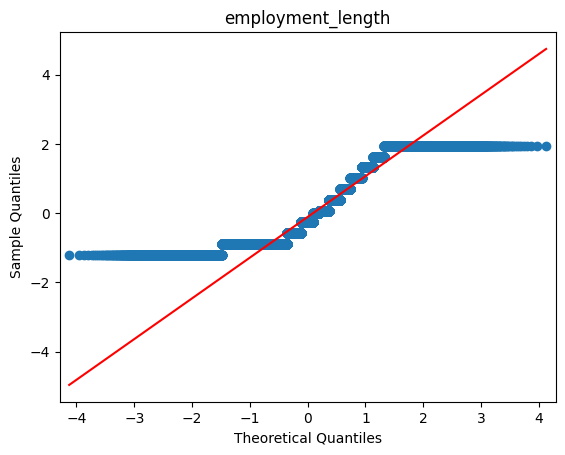

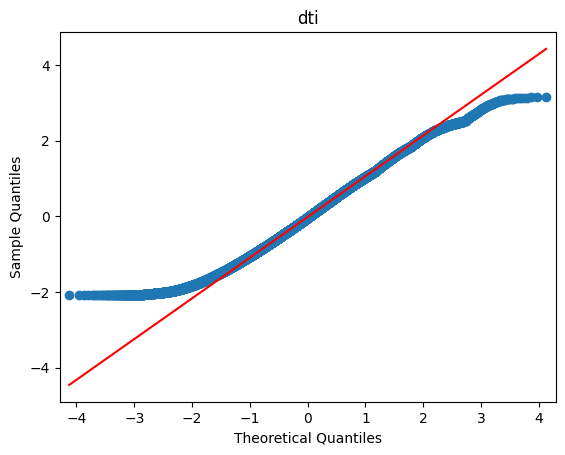

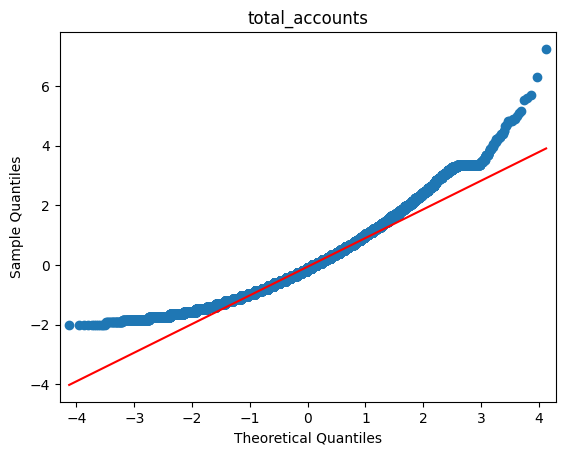

/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:282: RuntimeWarning: divide by zero encountered in divide
  return (self.sorted_data - self.loc) / self.scale
/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:282: RuntimeWarning: invalid value encountered in divide
  return (self.sorted_data - self.loc) / self.scale


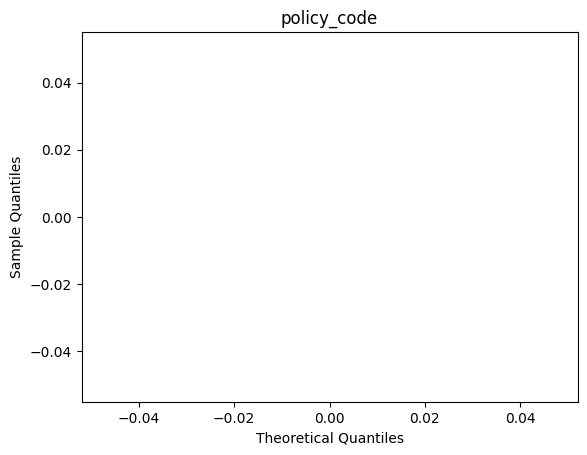

In [20]:
# under 1 HISTOGRAMS
for column in less_than_1:
    plotter.plot_qq(df[column],title=column)

In [21]:
print(over_1)

['id', 'member_id', 'term', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


In [22]:
print(less_than_1)

['Unnamed: 0', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'employment_length', 'dti', 'total_accounts', 'policy_code']


## Non-skewed Columns:

- dti

## Skewed Columns:

### Less than 1

- loan_amount 
- funded_amount 
- funded_amount_inv 
- int_rate 
- instalment 
- employment_length
- total_accounts 
- policy_code

### Over 1
- term
- annual_inc
- delinq_2yrs
- inq_last_6mths
- open_accounts
- out_prncp
- out_prncp_inv
- total_payment
- total_payment_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_payment_amount
- collections_12_mths_ex_med

# Decision: Skew with over 1 will not be transformed.

Why?
- They tend to be overly positively skewed and therefore unlikely to follow a natural normal distibution pattern.

## Decision: Skewed Columns (less than 1) to NOT transform (with reason)

- total_accounts: Not much distirbution going on i.e., the range is narrowed
- employment_length: Two peaks indicating that it doesn't naturally follow normal distribution
- policy_code: single  value

## Decision: Skewed Columns to transform 
- loan_amount 
- funded_amount 
- funded_amount_inv 
- int_rate 
- instalment 

## Transforms to implement:
- Log Transform
- Box-Cox Transform
- Yeo-Johnson

In [23]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson
import numpy as np

In [24]:
columns_to_transform = ['loan_amount', 'funded_amount','funded_amount_inv','int_rate','instalment']

In [25]:
log_results = []
boxcox_results = []
yeojohnson_results = []

log_arrays = []
boxcox_arrays = []
yeojohnson_arrays = []

for column in columns_to_transform:
    log_array = df[column].map(lambda i: np.log(i) if i > 0 else 0)
    log_arrays.append(log_array)
    log_results.append(log_array.skew())

    boxcox_array = df[column] +1
    boxcox_array = boxcox(boxcox_array)
    boxcox_array = pd.Series(boxcox_array[0])
    boxcox_arrays.append(boxcox_array)
    boxcox_results.append(boxcox_array.skew()) 

    yeojohnson_array = df[column]
    yeojohnson_array = yeojohnson(yeojohnson_array)
    yeojohnson_array = pd.Series(yeojohnson_array[0])
    yeojohnson_arrays.append(yeojohnson_array)
    yeojohnson_results.append(yeojohnson_array.skew())



/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2488: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)


In [26]:
print(f"{log_results} \n {boxcox_results} \n {yeojohnson_results} ")


[-0.6774872814309607, -0.7376500865398391, -4.3451915152986835, -0.4004921929919291, -0.6678200073906861] 
 [-0.043151419272494766, -0.034223605, -0.036331724, -0.012103327, -0.020674653] 
 [-0.04315141927249605, -0.03380541, -0.035900716, -0.01208169, -0.021265198] 


In [27]:
for column, array in zip(columns_to_transform, log_arrays): 
    print(array)
    print(df[column])

0        8.987197
1        9.487972
2        9.680344
3        9.615805
4        9.615805
           ...   
54226    8.517193
54227    8.517193
54228    8.160518
54229    8.517193
54230    8.517193
Name: loan_amount, Length: 54231, dtype: float64
0         8000
1        13200
2        16000
3        15000
4        15000
         ...  
54226     5000
54227     5000
54228     3500
54229     5000
54230     5000
Name: loan_amount, Length: 54231, dtype: int32
0        8.987197
1        9.487972
2        9.680344
3        9.615805
4        9.615805
           ...   
54226    8.517193
54227    8.517193
54228    8.160518
54229    8.517193
54230    8.517193
Name: funded_amount, Length: 54231, dtype: float64
0         8000.0
1        13200.0
2        16000.0
3        15000.0
4        15000.0
          ...   
54226     5000.0
54227     5000.0
54228     3500.0
54229     5000.0
54230     5000.0
Name: funded_amount, Length: 54231, dtype: float32
0        8.987197
1        9.487972
2        9.680344


loan_amount
Log Transform Skew:	-0.6774872814309607
Original:		0.8052592257800115
Effective


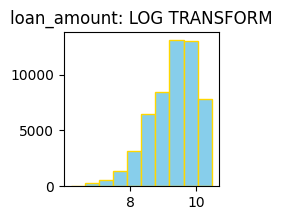

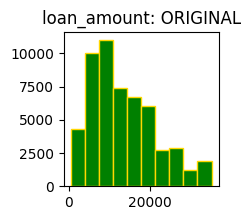

funded_amount
Log Transform Skew:	-0.7376500865398391
Original:		0.8455629348754883
Effective


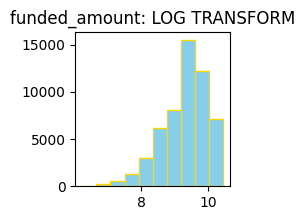

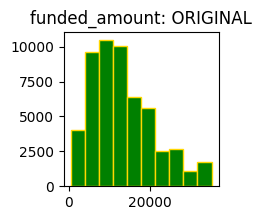

funded_amount_inv
Log Transform Skew:	-4.3451915152986835
Original:		0.813927412033081
Not Effective


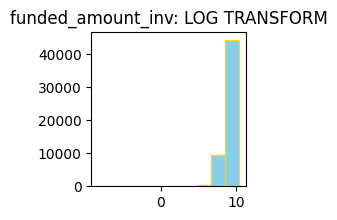

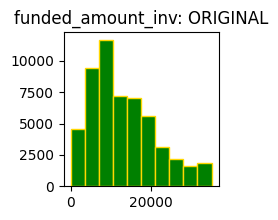

int_rate
Log Transform Skew:	-0.4004921929919291
Original:		0.43319249153137207
Effective


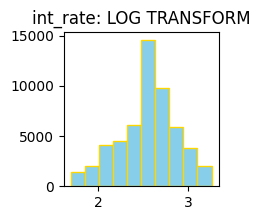

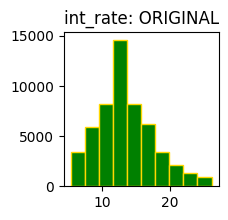

instalment
Log Transform Skew:	-0.6678200073906861
Original:		0.9969815611839294
Effective


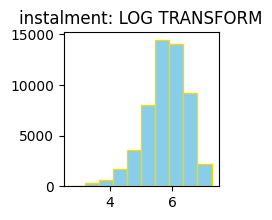

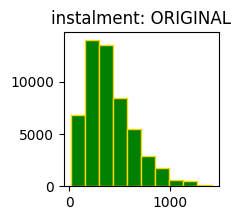

In [28]:
# POST TRANSFORMATION HISTOGRAMS
# LOG TRANSFORM HISTOGRAMS

for column, array in zip(columns_to_transform, log_arrays): 
    
    print(column)
    print(f"Log Transform Skew:\t{array.skew()}")
    print(f"Original:\t\t{df[column].skew()}")
    if abs(array.skew()) < abs(df[column].skew()):
        print("Effective")
    else:
        print("Not Effective")
        
    plotter.plot_histogram(data=array,title=f"{column}: LOG TRANSFORM")
    plotter.plot_histogram(data=df[column],title=f"{column}: ORIGINAL", color="green")
    

loan_amount
Boxcox Transform Skew:	-0.043151419272494766
Original:		0.8052592257800115
Effective


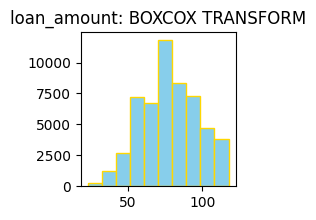

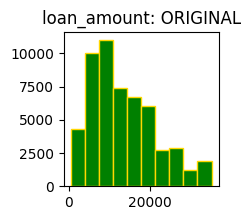

funded_amount
Boxcox Transform Skew:	-0.03422360494732857
Original:		0.8455629348754883
Effective


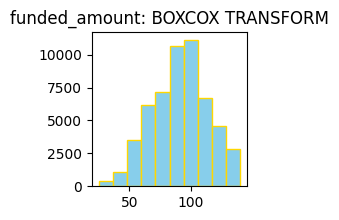

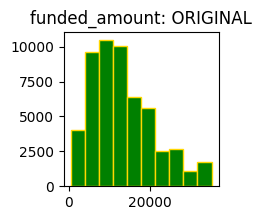

funded_amount_inv
Boxcox Transform Skew:	-0.036331724375486374
Original:		0.813927412033081
Effective


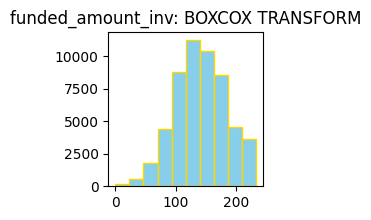

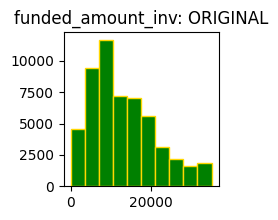

int_rate
Boxcox Transform Skew:	-0.012103326618671417
Original:		0.43319249153137207
Effective


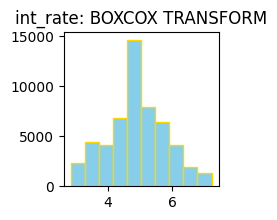

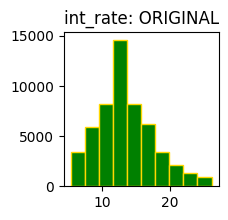

instalment
Boxcox Transform Skew:	-0.020674653351306915
Original:		0.9969815611839294
Effective


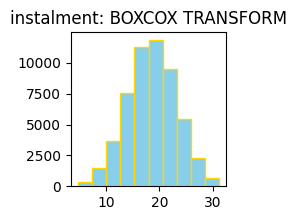

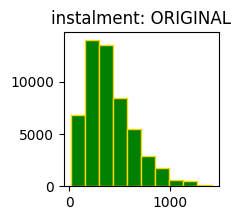

In [29]:
# POST TRANSFORMATION HISTOGRAMS
# BOXCOX TRANSFORM HISTOGRAMS

for column, array in zip(columns_to_transform, boxcox_arrays): 
    
    print(column)
    print(f"Boxcox Transform Skew:\t{array.skew()}")
    print(f"Original:\t\t{df[column].skew()}")
    if abs(array.skew()) < abs(df[column].skew()):
        print("Effective")
    else:
        print("Not Effective")
    plotter.plot_histogram(data=array,title=f"{column}: BOXCOX TRANSFORM")
    plotter.plot_histogram(data=df[column],title=f"{column}: ORIGINAL", color="green")

loan_amount
Yeojohnson Transform Skew:	-0.04315141927249605
Original:			0.8052592257800115
Effective


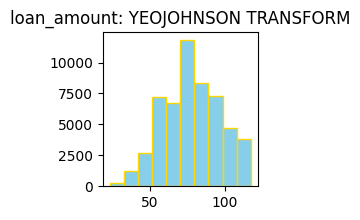

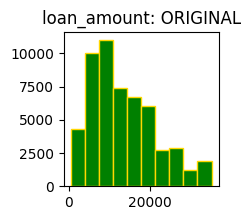

funded_amount
Yeojohnson Transform Skew:	-0.03380541130900383
Original:			0.8455629348754883
Effective


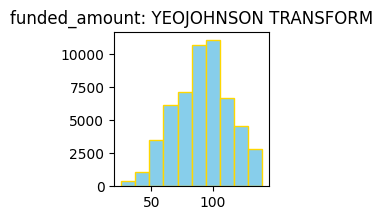

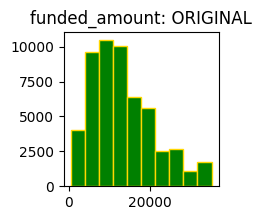

funded_amount_inv
Yeojohnson Transform Skew:	-0.03590071573853493
Original:			0.813927412033081
Effective


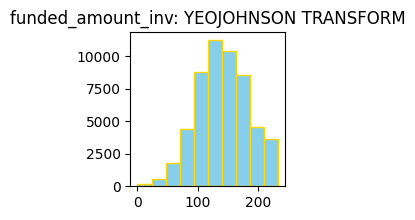

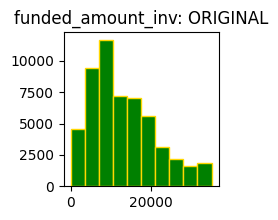

int_rate
Yeojohnson Transform Skew:	-0.01208169013261795
Original:			0.43319249153137207
Effective


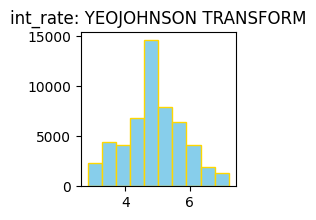

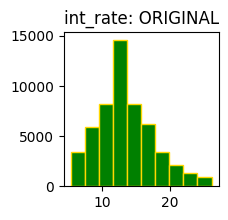

instalment
Yeojohnson Transform Skew:	-0.021265197545289993
Original:			0.9969815611839294
Effective


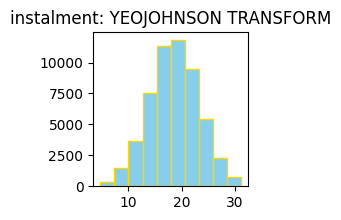

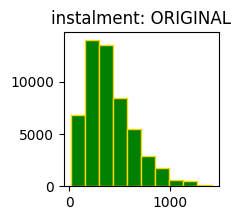

In [30]:
# POST TRANSFORMATION HISTOGRAMS
# YEOJOHNSON TRANSFORM HISTOGRAMS

for column, array in zip(columns_to_transform, yeojohnson_arrays): 
    
    print(column)
    print(f"Yeojohnson Transform Skew:\t{array.skew()}")
    print(f"Original:\t\t\t{df[column].skew()}")
    if abs(array.skew()) < abs(df[column].skew()):
        print("Effective")
    else:
        print("Not Effective")
    plotter.plot_histogram(data=array,title=f"{column}: YEOJOHNSON TRANSFORM")
    plotter.plot_histogram(data=df[column],title=f"{column}: ORIGINAL", color="green")

## Results for Log, BoxCox and YeoJohnson Transforms vs Original
- All transforms are effective in normalising the variables, except Log-Transform for funded_amount_inv

## Log vs BoxCox vs YeoJohnson Transforms 

In [31]:
for column, log_array, boxcox_array, yeojohnson_array in zip(columns_to_transform,log_arrays,boxcox_arrays, yeojohnson_arrays): 
    

    log_skew = log_array.skew()
    boxcox_skew = boxcox_array.skew()
    yeojohnson_skew = yeojohnson_array.skew()
    skew_compare= dict.fromkeys(["Log Transform", "Boxcox Transform", "YeoJohnson Transform"])
    print("\n",column)
    print(f"Log Transform Skew:\t{log_skew}")
    print(f"Boxcox Transform Skew:\t{boxcox_skew}")
    print(f"Yeojohnson Transform Skew:\t{yeojohnson_skew}")
    skew_compare["Log Transform"] = abs(log_skew)
    skew_compare["Boxcox Transform"] = abs(boxcox_skew)
    skew_compare["YeoJohnson Transform"] = abs(yeojohnson_skew)
    key_max = min(skew_compare, key = skew_compare.get)  
    print("The key with the maximum value is: ", key_max)
    print(f"Original:\t\t\t{df[column].skew()}")


 loan_amount
Log Transform Skew:	-0.6774872814309607
Boxcox Transform Skew:	-0.043151419272494766
Yeojohnson Transform Skew:	-0.04315141927249605
The key with the maximum value is:  Boxcox Transform
Original:			0.8052592257800115

 funded_amount
Log Transform Skew:	-0.7376500865398391
Boxcox Transform Skew:	-0.03422360494732857
Yeojohnson Transform Skew:	-0.03380541130900383
The key with the maximum value is:  YeoJohnson Transform
Original:			0.8455629348754883

 funded_amount_inv
Log Transform Skew:	-4.3451915152986835
Boxcox Transform Skew:	-0.036331724375486374
Yeojohnson Transform Skew:	-0.03590071573853493
The key with the maximum value is:  YeoJohnson Transform
Original:			0.813927412033081

 int_rate
Log Transform Skew:	-0.4004921929919291
Boxcox Transform Skew:	-0.012103326618671417
Yeojohnson Transform Skew:	-0.01208169013261795
The key with the maximum value is:  YeoJohnson Transform
Original:			0.43319249153137207

 instalment
Log Transform Skew:	-0.6678200073906861
Boxcox 

## Normalisation Transform Decisions: 

- loan_amount       --> Boxcox 
- funded_amount     --> YeoJohnson 
- funded_amount_inv --> YeoJohnson 
- int_rate          --> YeoJohnson 
- installment       --> BoxCox

In [32]:
# APPLY THE TRANSFORMATIONS BASED OFF THE BEST POWER TRANSFORM METHOD FOR NORMALISATION

loan_amount_transformed = transformer.apply_powertransformation(df,'loan_amount',transformation='boxcox')

funded_amount_transformed = transformer.apply_powertransformation(df,'funded_amount',transformation='yeojohnson')

funded_amount_inv_transformed = transformer.apply_powertransformation(df,'funded_amount_inv',transformation='yeojohnson')

int_rate_transformed = transformer.apply_powertransformation(df,'int_rate',transformation='yeojohnson')

instalment_transformed = transformer.apply_powertransformation(df,'instalment',transformation='boxcox')


/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/vant28/.conda/envs/my_env/lib/python3.11/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


/tmp/ipykernel_140903/1806868699.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[columns_to_transform].hist(ax=ax, color = "green", edgecolor = "gold")


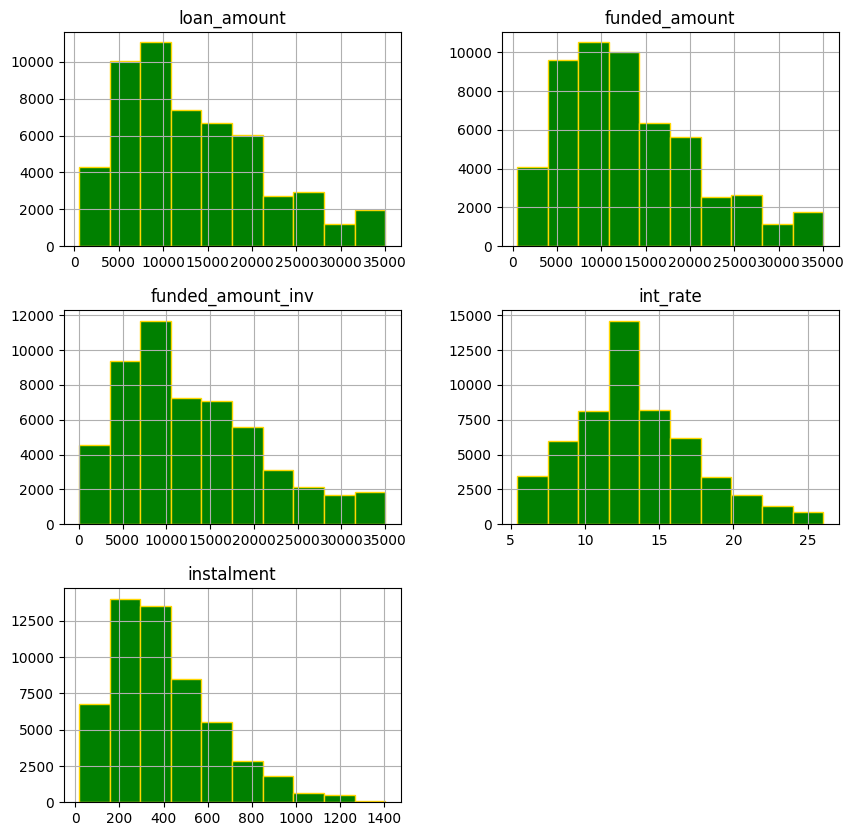

In [33]:
# PLOT ORIGINAL COLUMNS
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df[columns_to_transform].hist(ax=ax, color = "green", edgecolor = "gold")
plt.show()

/tmp/ipykernel_140903/3897045122.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  transformed_columns.hist(ax=ax, color = "skyblue", edgecolor = "gold")


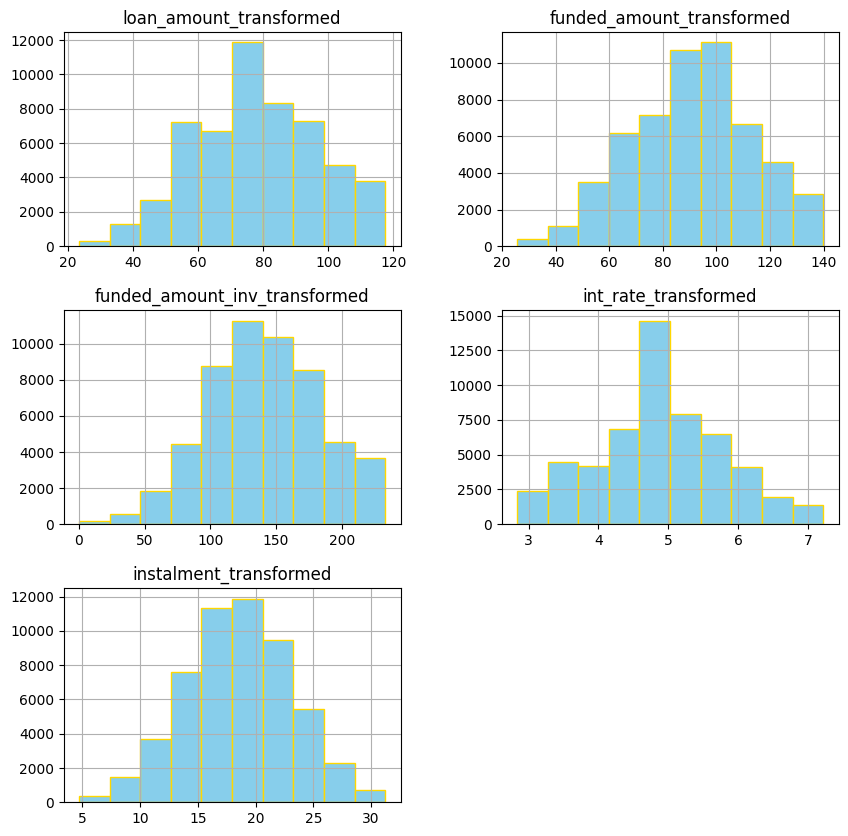

In [34]:
# PLOT TRANSFROMED NORMALISED COLUMNS
transformed_columns = pd.DataFrame({'loan_amount_transformed':loan_amount_transformed,'funded_amount_transformed': funded_amount_transformed,'funded_amount_inv_transformed':funded_amount_inv_transformed,'int_rate_transformed':int_rate_transformed,'instalment_transformed':instalment_transformed})

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
transformed_columns.hist(ax=ax, color = "skyblue", edgecolor = "gold")
plt.show()

ORIGINAL SKEW:0.8052592257800115,TRANSFORMED SKEW: -0.043151419272494766


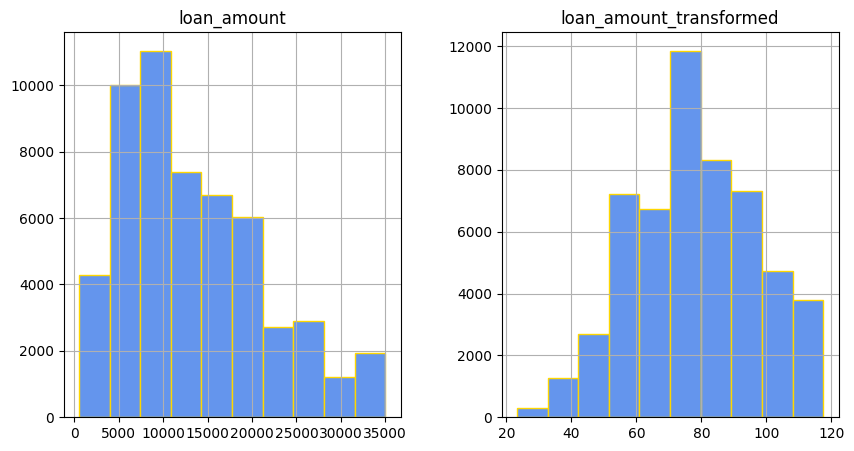

ORIGINAL SKEW:0.8455629348754883,TRANSFORMED SKEW: -0.03380541130900383


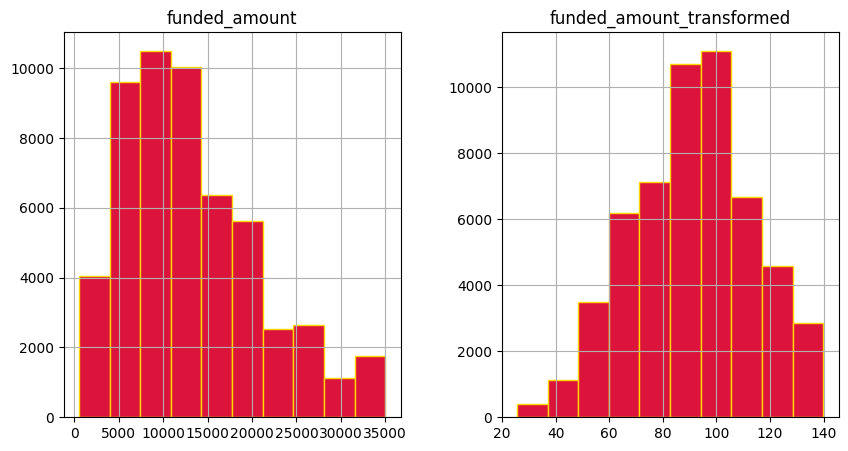

ORIGINAL SKEW:0.813927412033081,TRANSFORMED SKEW: -0.03590071573853493


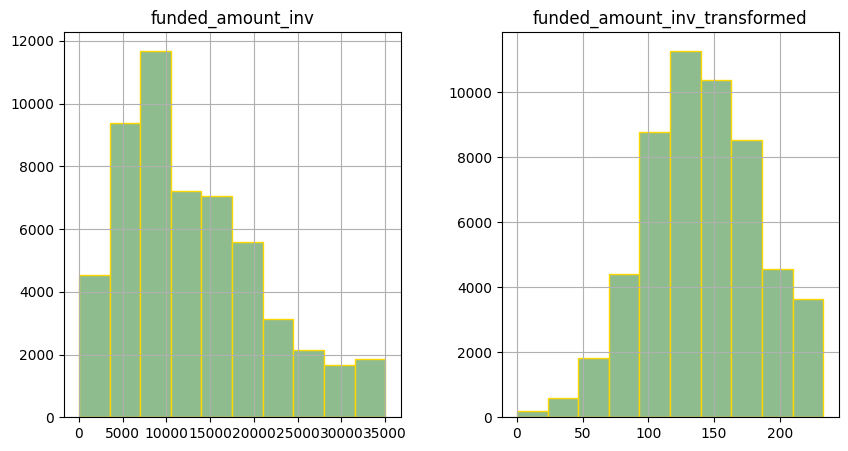

ORIGINAL SKEW:0.43319249153137207,TRANSFORMED SKEW: -0.01208169013261795


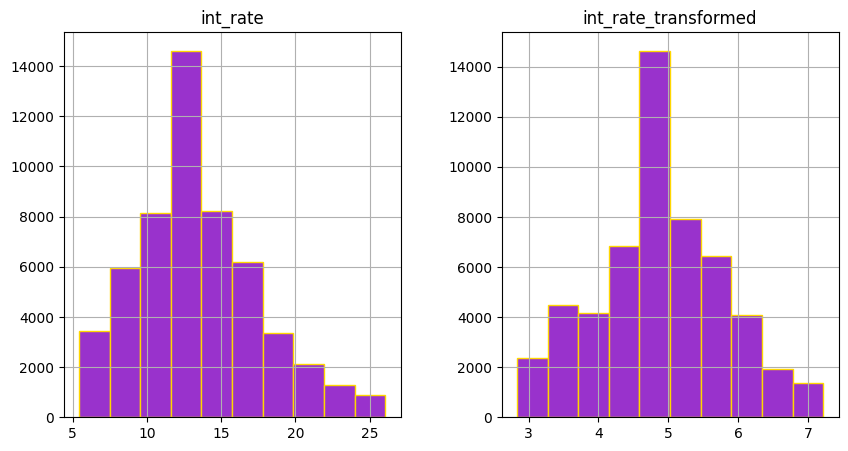

ORIGINAL SKEW:0.9969815611839294,TRANSFORMED SKEW: -0.020674653351306915


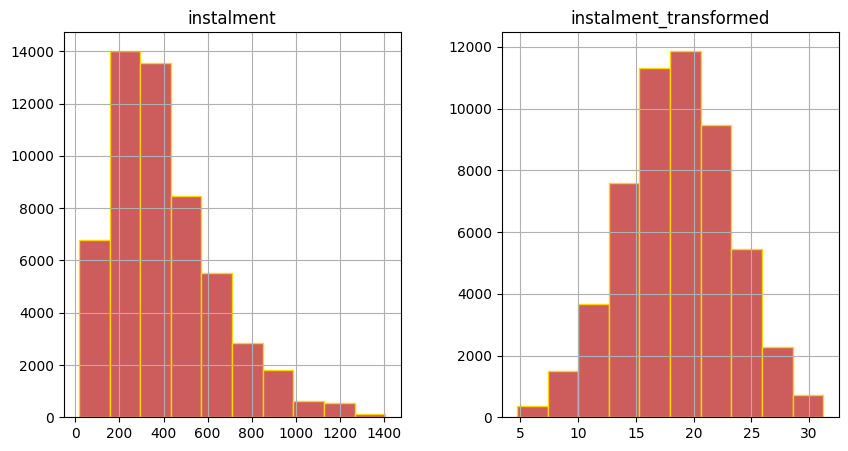

In [35]:
# FOR EASIER VISUAL COMPARISON:
loan_amount_compare = pd.DataFrame({'loan_amount':df['loan_amount'],
                                    'loan_amount_transformed':loan_amount_transformed})
funded_amount_compare = pd.DataFrame({'funded_amount':df['funded_amount'],
                                      'funded_amount_transformed':funded_amount_transformed})
funded_amount_inv_compare = pd.DataFrame({'funded_amount_inv':df['funded_amount_inv'],
                                          'funded_amount_inv_transformed':funded_amount_inv_transformed})
int_rate_compare = pd.DataFrame({'int_rate':df['int_rate'],
                                 'int_rate_transformed':int_rate_transformed})
instalment_compared = pd.DataFrame({'instalment':df['instalment'],
                                    'instalment_transformed':instalment_transformed})

comparison_dataframe = [loan_amount_compare,funded_amount_compare,
                        funded_amount_inv_compare,int_rate_compare,instalment_compared]

colors = ['CornflowerBlue','Crimson','DarkSeaGreen','DarkOrchid','IndianRed']

for comparision,color in zip(comparison_dataframe,colors):
    print(f"ORIGINAL SKEW:{comparision[comparision.keys()[0]].skew()}," 
          f"TRANSFORMED SKEW: {comparision[comparision.keys()[1]].skew()}" )
    comparision.hist(figsize=(10,5), color = color, edgecolor = "gold")
    plt.show()

In [36]:
# APPLY THE TRANSFROMED ARRAYS BACK INTO THE DATAFRAME

df['loan_amount'] = loan_amount_transformed
df['funded_amount_inv'] = loan_amount_transformed
df['funded_amount'] = funded_amount_inv_transformed
df['int_rate'] = int_rate_transformed
df['instalment'] = instalment_transformed

In [37]:
df.to_csv("normalised_loan_payments.csv")